In [104]:
%matplotlib inline

In [131]:
import numpy
import pickle
import seaborn as sns

from collections import defaultdict

In [87]:
label_types = ['URI', 'YAGO', 'LKIF', 'ENTITY', 'NER']

def lables_to_classes(labels):
    classes = {}
    for index, label_type in enumerate(label_types):
        level_labels = [(x[index][0] if isinstance(x[index], list) else x[index]) for x in labels]
        level_labels = [('I-' + x if (x != 'O' and x != 'I' and not x.startswith('I-')) else x) for x in level_labels]
        classes[label_type] = numpy.unique(level_labels, return_counts=True)
    return classes

In [88]:
def print_classes(classes_dict):
    for level, level_classes in classes_dict.items():
        print(level)
        for class_name, count in zip(*level_classes):
            print('\t', class_name, count)

In [122]:
def plot_class_distribution(classes):
    for level in reversed(label_types[:-1]):
        if not level in classes:
            continue
        print(level)
        distributions = numpy.sort(classes[level][1])[:-1]
        sns.distplot(distributions, kde=False)
        sns.plt.show()

In [90]:
def compare_classes(classes1, classes2):
    for level in classes1.keys():
        if level not in classes2:
            continue
        classes_names1 = set(classes1[level][0].tolist())
        classes_names2 = set(classes2[level][0].tolist())
        intersection = classes_names1.intersection(classes_names2)
        counts = sum([(count if class_name in intersection and class_name != 'O' else 0) for class_name, count in zip(*classes1[level])])
        total_instances = sum([(count if class_name != 'O' else 0) for class_name, count in zip(*classes1[level])])
        print(level)
        print('\tMax recognized classes', len(intersection), 'of', len(classes_names1))
        print('\tMax recognized instances', counts, 'of', total_instances)
        print('\tMax possible accuracy', (float(counts) + classes1[level][1].sum() - total_instances)/classes1[level][1].sum())

In [159]:
def counts_to_dict(labels, counts):
    classes_dict = defaultdict(int)
    for label, count in zip(labels, counts):
        classes_dict[label] = count
    return classes_dict

def plot_joint_classes(classes1, classes2):
    for level in reversed(label_types[:-1]):
        if not level in classes1 or not level in classes2:
            continue
        print(level)
        count_dict1 = counts_to_dict(*classes1[level])
        count_dict2 = counts_to_dict(*classes2[level])
        distributions1 = []
        distributions2 = []
        for label in set(list(count_dict1.keys()) + list(count_dict2.keys())):
            if label == 'O':
                continue
            distributions1.append(count_dict1[label])
            distributions2.append(count_dict2[label])
        with sns.axes_style("white"):
            sns.jointplot(x=numpy.array(distributions1), y=numpy.array(distributions2), color="k");
            sns.plt.show()

In [91]:
with open('/home/ccardellino/datasets/echr/annotated/processed/classes.pickle', 'rb') as echr_file:
    echr_classes = pickle.load(echr_file)

In [120]:
print_classes(echr_classes)

ENTITY
	 I- 2
	 I-abstraction 250
	 I-act 845
	 I-document 331
	 I-organization 258
	 I-person 278
	 O 1985
NER
	 I 1964
	 O 1985
YAGO
	 I- 17
	 I-Crime 12
	 I-Legal_Proceeding 16
	 I-Legal_Role 3
	 I-NOT_IN_WIKIPEDIA_Applicability 3
	 I-NOT_IN_WIKIPEDIA_Application 3
	 I-NOT_IN_WIKIPEDIA_Compliance_(law) 3
	 I-NOT_IN_WIKIPEDIA_Examination 10
	 I-NOT_IN_WIKIPEDIA_Identification_of_responsible 6
	 I-NOT_IN_WIKIPEDIA_Inhuman_and_Degrading_Treatment 9
	 I-NOT_IN_WIKIPEDIA_Investigation 79
	 I-NOT_IN_WIKIPEDIA_Police_records 3
	 I-NOT_IN_WIKIPEDIA_assessment 10
	 I-Public_Body 23
	 I-https://en.wikipedia.org/wiki/Burden_of_proof_(law) 5
	 I-https://en.wikipedia.org/wiki/Damages 10
	 I-https://en.wikipedia.org/wiki/Discrimination 3
	 I-https://en.wikipedia.org/wiki/Evidence_(law) 32
	 I-https://en.wikipedia.org/wiki/Government 33
	 I-https://en.wikipedia.org/wiki/Hearing_(law) 10
	 I-https://en.wikipedia.org/wiki/Interior_ministry 5
	 I-https://en.wikipedia.org/wiki/Jurisdiction 10
	 I-http

ENTITY


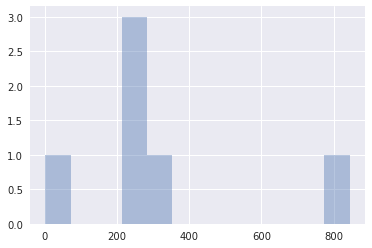

LKIF


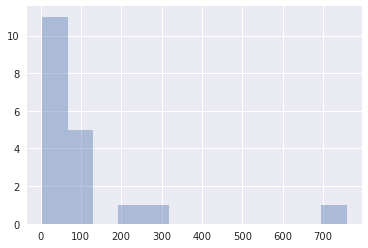

YAGO


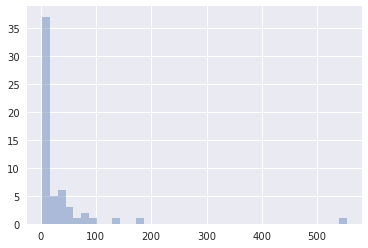

URI


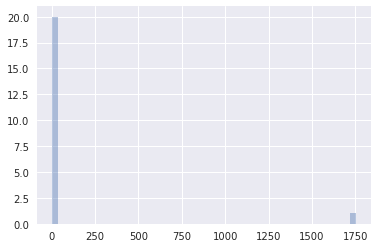

In [123]:
plot_class_distribution(echr_classes)

In [93]:
with open('/home/ccardellino/datasets/echr/annotated/evaluation/handcrafted/labels.pickle', 'rb') as ev_file:
    evaluation_labels = pickle.load(ev_file)

In [94]:
evaluataion_classes = lables_to_classes(evaluation_labels)

In [95]:
print_classes(evaluataion_classes)

ENTITY
	 I-abstraction 207
	 I-act 235
	 I-document 157
	 I-organization 150
	 I-person 78
	 O 2633
NER
	 I 827
	 O 2633
YAGO
	 I-Crime 22
	 I-Legal_Doctrine 12
	 I-Legal_Proceeding 4
	 I-NOT_IN_WIKIPEDIA_assessment 3
	 I-Organisation_Role 2
	 I-https://en.wikipedia.org/wiki/Asset_forfeiture 40
	 I-https://en.wikipedia.org/wiki/Confiscation 17
	 I-https://en.wikipedia.org/wiki/Constitutional_court 2
	 I-https://en.wikipedia.org/wiki/Criminal_procedure 18
	 I-https://en.wikipedia.org/wiki/Damages 6
	 I-https://en.wikipedia.org/wiki/Government 20
	 I-https://en.wikipedia.org/wiki/Jurisdiction 1
	 I-https://en.wikipedia.org/wiki/Legal_case 158
	 I-https://en.wikipedia.org/wiki/Principle 18
	 I-https://en.wikipedia.org/wiki/Violation_of_law 7
	 I-wordnet_act_106532095 2
	 I-wordnet_amnesty_101249315 1
	 I-wordnet_applicant_109607280 49
	 I-wordnet_article_106392935 97
	 I-wordnet_association_108049401 2
	 I-wordnet_authority_105176607 3
	 I-wordnet_case_law_106535035 7
	 I-wordnet_company_

ENTITY


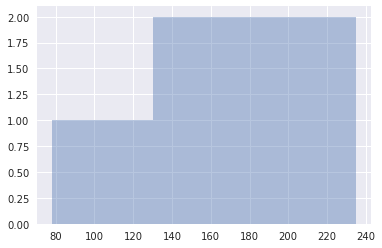

LKIF


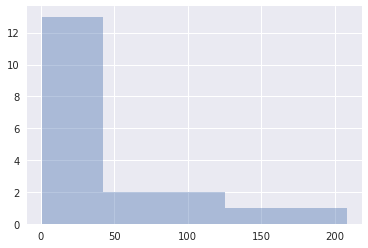

YAGO


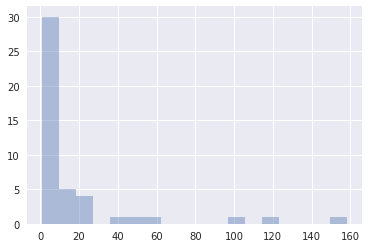

URI


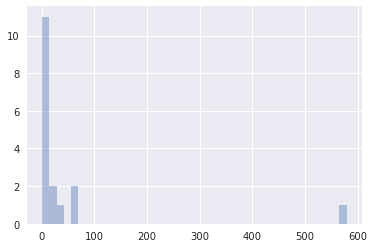

In [124]:
plot_class_distribution(evaluataion_classes)

In [96]:
compare_classes(evaluataion_classes, echr_classes)

ENTITY
	Max recognized classes 6 of 6
	Max recognized instances 827 of 827
	Max possible accuracy 1.0
NER
	Max recognized classes 2 of 2
	Max recognized instances 827 of 827
	Max possible accuracy 1.0
YAGO
	Max recognized classes 27 of 46
	Max recognized instances 658 of 800
	Max possible accuracy 0.958959537572
LKIF
	Max recognized classes 15 of 20
	Max recognized instances 774 of 812
	Max possible accuracy 0.98901734104
URI
	Max recognized classes 5 of 18
	Max recognized instances 719 of 827
	Max possible accuracy 0.968786127168


ENTITY


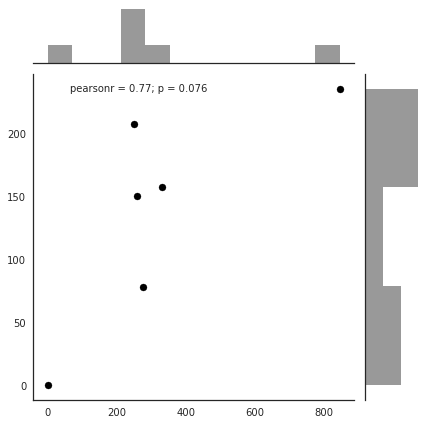

LKIF


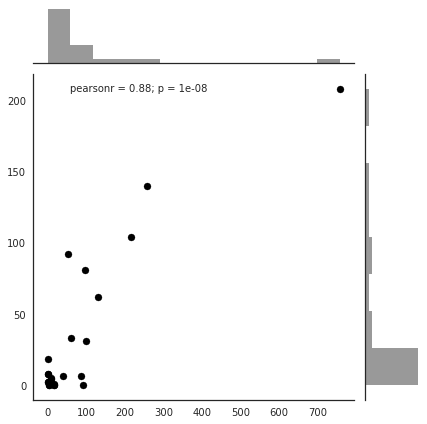

YAGO


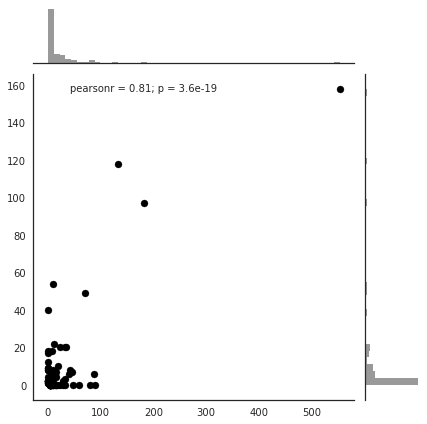

URI


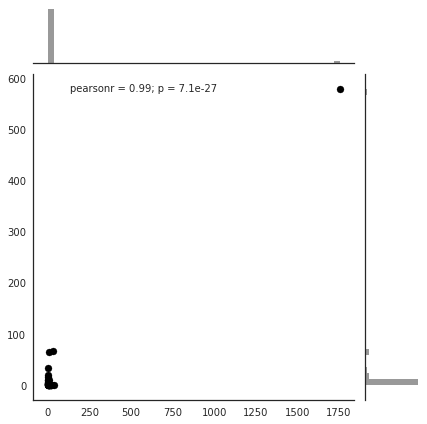

In [160]:
plot_joint_classes(echr_classes, evaluataion_classes)

In [149]:
x, y = numpy.random.multivariate_normal([2, 6], [[0.2, 0], [0, 0.3]], 1000).T
x.shape

(1000,)

Comparison with Wikipedia classes
---

In [97]:
with open('/home/ccardellino/datasets/classes.p', 'rb') as wiki_file:
    wiki_classes = pickle.load(wiki_file)

In [98]:
compare_classes(evaluataion_classes, wiki_classes)

ENTITY
	Max recognized classes 6 of 6
	Max recognized instances 827 of 827
	Max possible accuracy 1.0
NER
	Max recognized classes 2 of 2
	Max recognized instances 827 of 827
	Max possible accuracy 1.0
YAGO
	Max recognized classes 10 of 46
	Max recognized instances 219 of 800
	Max possible accuracy 0.832080924855
LKIF
	Max recognized classes 9 of 20
	Max recognized instances 443 of 812
	Max possible accuracy 0.893352601156
URI
	Max recognized classes 3 of 18
	Max recognized instances 43 of 827
	Max possible accuracy 0.773410404624


In [99]:
with open('/home/ccardellino/datasets/echr/annotated/evaluation/handcrafted/labels.pickle', 'rb') as wiki_file:
    labels_echr = pickle.load(wiki_file)